In [1]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder#Now let's import encoder from sklearn library


In [44]:
#load the dataset
train = pd.read_csv(r'C:\Users\Shweta\Desktop\Data Science\Python Data Science\dataset\black\train.csv')
test = pd.read_csv(r'C:\Users\Shweta\Desktop\Data Science\Python Data Science\dataset\black\test.csv')


In [3]:
#analysis of the datset
print(train.head())
print()
print()
print(test.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

In [4]:
#dimensions of the data
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [5]:
#statistical analysis of data
print(train.describe())
print(test.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

In [6]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID               

In [7]:
#check for missing values
print(train.isna().sum())
print(test.isna().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


In [8]:
#impute the missing values in train st

train['Product_Category_2']= train['Product_Category_2'].fillna(train['Product_Category_2'].dropna().mode().values[0])
train['Product_Category_3']= train['Product_Category_3'].fillna(train['Product_Category_2'].dropna().mode().values[0])


In [9]:
#impute the missing values in test set

test['Product_Category_2']= test['Product_Category_2'].fillna(test['Product_Category_2'].dropna().mode().values[0])
test['Product_Category_3']= test['Product_Category_3'].fillna(test['Product_Category_2'].dropna().mode().values[0])

In [10]:
#categorical variable transformation
X = train.drop(["Purchase"], axis=1)
label = LabelEncoder()
#Now we will encode the data into labels using label encoder for easy computing
X = X.apply(label.fit_transform)#Here we applied encoder onto data
#X.head(12)


In [11]:
#data type conversion
X.Gender = pd.to_numeric(X.Gender)
X.Age = pd.to_numeric(X.Age)
X.Occupation = pd.to_numeric(X.Occupation)
X.City_Category = pd.to_numeric(X.City_Category)
X.Stay_In_Current_City_Years = pd.to_numeric(X.Stay_In_Current_City_Years)
X.Marital_Status = pd.to_numeric(X.Marital_Status)
X.Product_Category_1 = pd.to_numeric(X.Product_Category_1)
X.Product_Category_2 = pd.to_numeric(X.Product_Category_2)
X.Product_Category_3 = pd.to_numeric(X.Product_Category_3)
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,672,0,0,10,0,2,0,2,6,4
1,0,2376,0,0,10,0,2,0,0,4,10
2,0,852,0,0,10,0,2,0,11,6,4
3,0,828,0,0,10,0,2,0,11,12,4
4,1,2734,1,6,16,2,4,0,7,6,4


In [39]:
label = LabelEncoder()
#Now we will encode the data into labels using label encoder for easy computing
test = test.apply(label.fit_transform)#Here we applied encoder onto data
#X.head(12)

In [40]:
#data type conversion
test.Gender = pd.to_numeric(test.Gender)
test.Age = pd.to_numeric(test.Age)
test.Occupation = pd.to_numeric(test.Occupation)
test.City_Category = pd.to_numeric(test.City_Category)
test.Stay_In_Current_City_Years = pd.to_numeric(test.Stay_In_Current_City_Years)
test.Marital_Status = pd.to_numeric(test.Marital_Status)
test.Product_Category_1 = pd.to_numeric(test.Product_Category_1)
test.Product_Category_2 = pd.to_numeric(test.Product_Category_2)
test.Product_Category_3 = pd.to_numeric(test.Product_Category_3)
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,3,1144,1,4,7,1,2,1,0,9,4
1,8,994,1,2,17,2,0,0,2,3,4
2,9,2672,0,3,1,1,4,1,4,12,4
3,9,1299,0,3,1,1,4,1,3,7,4
4,10,519,0,2,1,2,1,0,3,3,8


C:\Users\Shweta\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Purchase amount Distribution')

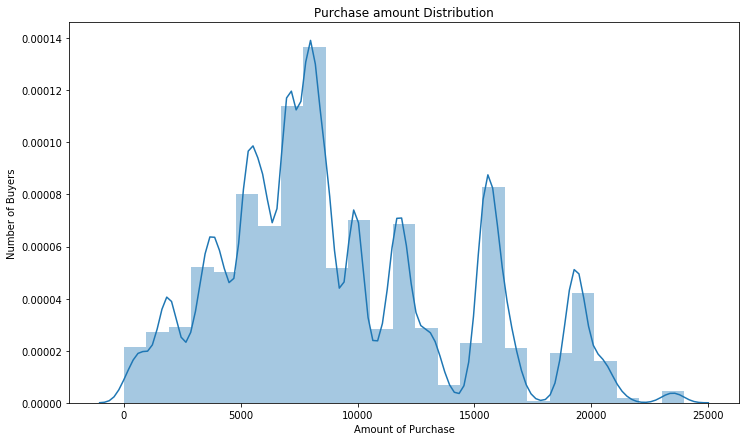

In [12]:
#exploration of dataset
#1. Distribution of target variable

import seaborn as sns

plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel('Amount of Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

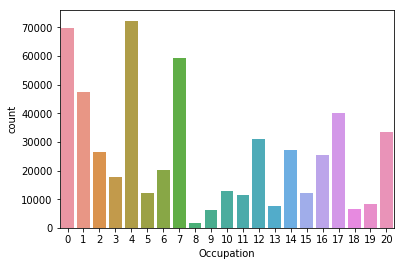

In [13]:
sns.countplot(X.Occupation)

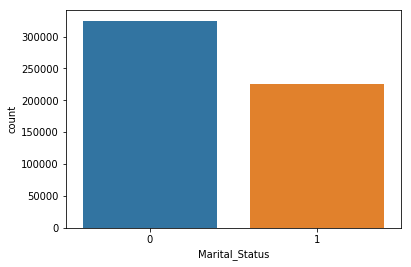

In [14]:
sns.countplot(X.Marital_Status)

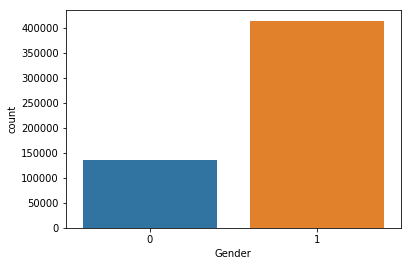

In [15]:
sns.countplot(X.Gender)


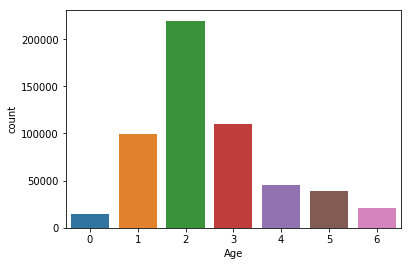

In [16]:
sns.countplot(X.Age)

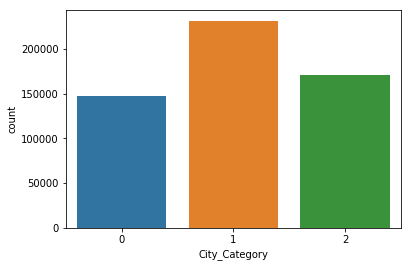

In [17]:
sns.countplot(X.City_Category)

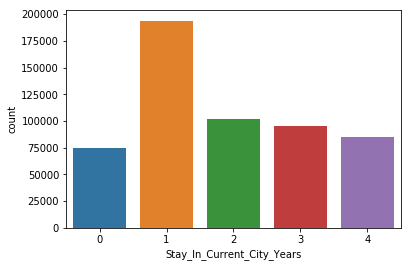

In [18]:
sns.countplot(X.Stay_In_Current_City_Years)

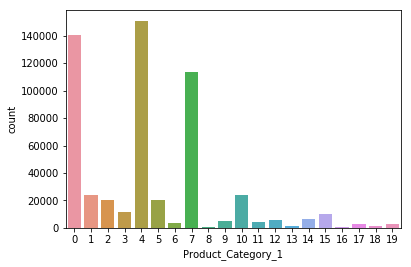

In [19]:
sns.countplot(X.Product_Category_1)

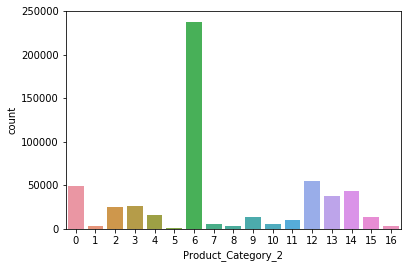

In [20]:
sns.countplot(X.Product_Category_2)

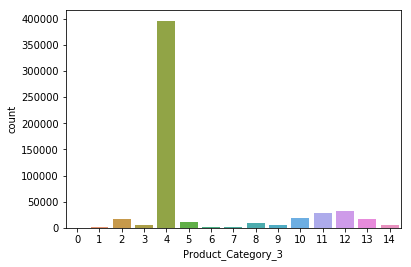

In [21]:
sns.countplot(X.Product_Category_3)

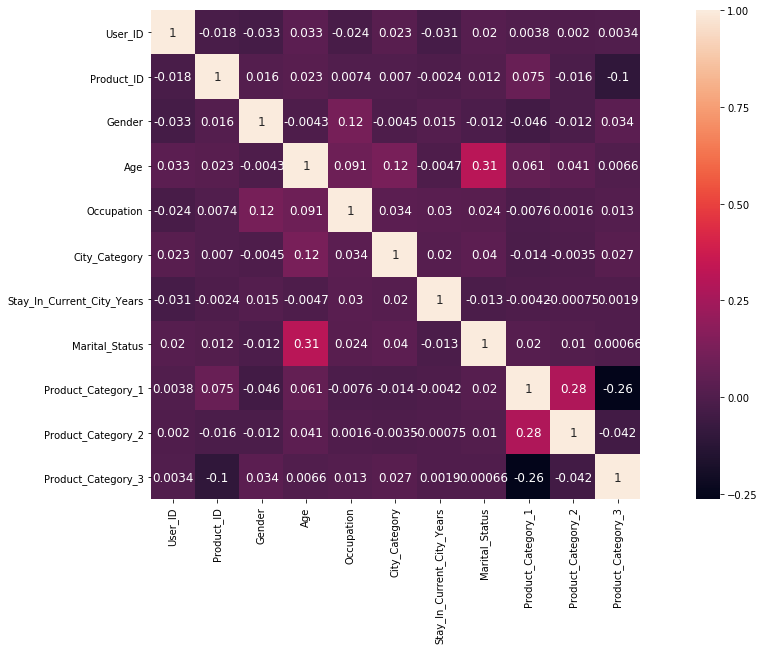

In [22]:
correlations = X.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(correlations, square = True,annot_kws={'size': 12}, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for j in range(X.shape[1]):
     k = variance_inflation_factor(X.values, j)
     print(X.columns[j],":",k)
     

User_ID : 3.5464790396772803
Product_ID : 3.404421237351837
Gender : 3.675604197666046
Age : 4.70666517738181
Occupation : 2.5240199603760325
City_Category : 2.8043681119188792
Stay_In_Current_City_Years : 2.829722089119563
Marital_Status : 1.8708275902700922
Product_Category_1 : 2.520760189261607
Product_Category_2 : 3.8760684937519634
Product_Category_3 : 3.7016407567444305


from the correlation plot and VIF, we found that age is highly correlated to other variable.So, we drop the age column 
from the data set, as it affects the accuracy the model.

In [24]:
#drop the age column
Y = X.drop(["Age"], axis =1)
target = train['Purchase']

In [25]:
#drop the ID columns
Y = Y.drop(['Product_ID'], axis=1)
Y = Y.drop(['User_ID'], axis=1)  

In [26]:
Y.columns

Index(['Gender', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3'],
      dtype='object')

In [27]:
#splitting the dataset

from sklearn.model_selection import train_test_split
train_x,test_x, train_y,test_y=train_test_split(Y, target,test_size=0.3)
#random state is excluded so as to see the variation in accuracy among diff models other wise it will give same accuracy.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(385047, 8)
(385047,)
(165021, 8)
(165021,)


In [28]:
#model building
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x,train_y)
predictions = model.predict(test_x)                           


In [29]:
#model evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test_y,predictions))
print('Root mean square error: %.2f' % rms)

Root mean square error: 4668.14


In [30]:
#model 
from sklearn import tree
model_Decision = tree.DecisionTreeRegressor(max_depth = 15)
model_Decision.fit(train_x, train_y)# now fit our model for training data
prediction=model_Decision.predict(test_x)

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test_y,prediction))
print('Root mean square error: %.2f' % rms)

Root mean square error: 3018.06


In [32]:
from sklearn.ensemble import  RandomForestRegressor
Rf = RandomForestRegressor(max_depth=15)
Rf.fit(train_x, train_y)# now fit our model for training data
prediction2= Rf.predict(test_x)

C:\Users\Shweta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
rms = sqrt(mean_squared_error(test_y,prediction2))
print('Root mean square error: %.2f' % rms)

Root mean square error: 2950.46


In [34]:
#to predict the n_estimators

from math import sqrt
from sklearn.metrics import mean_squared_error
estimators = np.arange(200,350,30)
rmse=[]
for n in estimators:
    Rf.set_params(n_estimators=n)
    Rf.fit(train_x, train_y)
    prediction2= Rf.predict(test_x)
    rmse.append(sqrt(mean_squared_error(test_y,prediction2))) 

In [35]:
rmse
#(200,230,260,290,320)

[2938.9767461740853,
 2938.1748515278045,
 2938.2953279130434,
 2938.8599619176834,
 2938.02243411172]

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
model = LinearRegression()
cv_score = cross_val_score(model, Y , target , cv= 15, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
cv_score.mean()
rmse1 = cv_score.mean()
print(rmse1)

4655.697502931678


In [37]:
from sklearn.model_selection import cross_val_score

Rf = RandomForestRegressor(max_depth=15, n_estimators = 230)
cv_score = cross_val_score(Rf, Y , target , cv= 15, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
cv_score.mean()
rmse2 = cv_score.mean()
print(rmse2)

2947.1906867838798


In [38]:
#model 
from sklearn import tree
model_Decision = tree.DecisionTreeRegressor(max_depth = 15)
cv_score = cross_val_score(model_Decision, Y , target , cv= 15, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
rmse3 = cv_score.mean()
print(rmse3)

3009.369977502662


In [41]:
#drop the required columns from the test set
test = test.drop(['Product_ID'], axis=1)
test = test.drop(['User_ID'], axis=1) 
test = test.drop(['Age'], axis=1)

In [43]:
Rf.fit( Y, target)
prediction= Rf.predict(test)# predict for the test data

print(prediction)

[13359.22789095 11213.35582697  6351.28673559 ... 12792.8431365
 20619.88856777  2580.79804523]


In [45]:
#store the prediction in required dataframe

output= pd.DataFrame(test,columns= ['User_ID','Product_ID'])
output['Purchase']= prediction
output.to_csv('my_submission3.csv', index=False)